# HW:請自行定義特殊族群，畫出此族群隨時間變化的消費狀況
* 依訂單裝置來源及支付方式分群，查看消費狀況

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime

# 資料讀取

In [2]:
Orders = pd.read_csv('datasets/Orders.csv', low_memory=False)
Orders.head().T

,0,1,2,3,4
DateId,20150703,20150703,20150703,20150703,20150703
MemberId,1388133,1388133,1388133,1388133,365787
OrderGroupCode,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x..."
TrackSourceTypeDef,Web,Web,Web,Web,Web
TrackDeviceTypeDef,Mobile,Mobile,Mobile,Mobile,Mobile
PayProfileTypeDef,SevenEleven,SevenEleven,SevenEleven,SevenEleven,SevenEleven
SalesOrderSlaveId,4457777,4457778,4457779,4457780,4457791
SalePageId,1242871,1242880,1242880,1175574,1194488
IsMajor,True,True,True,True,True
IsGift,False,False,False,False,False


# 修改日期格式

In [3]:
Orders['new_DateId'] = pd.to_datetime(Orders['DateId'].astype(str), format='%Y%m%d')
Orders['SalesOrderSlaveDateTime'] =  pd.to_datetime(Orders['SalesOrderSlaveDateTime'].astype(str), format='%Y-%m-%d %H:%M:%S') 
Orders['Hour'] =Orders['SalesOrderSlaveDateTime'].apply(lambda x: x.hour)
Orders['Day'] =Orders['SalesOrderSlaveDateTime'].apply(lambda x: x.day)

# 依「訂單裝置來源」區分族群
* 分為三類：Web、AndroidApp、iOSApp
* 主要以Web為大宗，Android和iOS幾乎差不多
* 問題：目前多數人不喜安裝多餘的app，因此使用app的顧客有沒有可能較為忠誠，而消費力較高?

In [4]:
Orders.TrackSourceTypeDef.value_counts().to_frame()

,TrackSourceTypeDef
Web,3170094
AndroidApp,1164055
iOSApp,1161127


In [5]:
df1= Orders.groupby('new_DateId').apply(lambda x:x.groupby("TrackSourceTypeDef")["SalesOrderSlaveTotalPayment"].sum()).unstack()
df1.head()

TrackSourceTypeDef,AndroidApp,Web,iOSApp
new_DateId,,,
2015-05-06,4667.0,NaN,1332.0
2015-05-07,5268.0,1809.0,1470.0
2015-05-08,12667.0,NaN,1997.0
2015-05-09,16586.0,1260.0,2593.0
2015-05-10,16104.0,2100.0,4698.0


### 依訂單金額的總和來看，Web理所當然地較高，三者在節慶、活動期間等的消費狀況也都有明顯地提高。

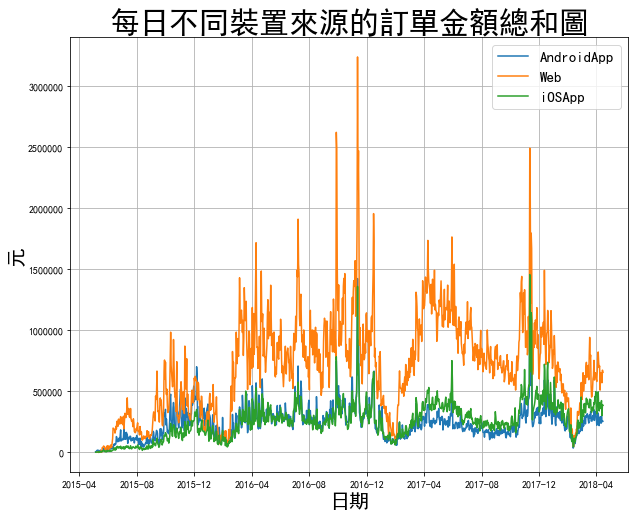

In [6]:
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.figure(figsize=(10,8))
plt.plot(df1)
plt.title("每日不同裝置來源的訂單金額總和圖",fontsize=30)
plt.xlabel("日期",fontsize=20)
plt.ylabel("元",fontsize=20)
plt.grid()
plt.legend(df1.columns,fontsize=15)

In [7]:
df2 = Orders.groupby('new_DateId').TrackSourceTypeDef.value_counts().to_frame().unstack()
df2.head()

TrackSourceTypeDef             
TrackSourceTypeDef         AndroidApp   Web iOSApp
new_DateId                                        
2015-05-06                       20.0   NaN    6.0
2015-05-07                       24.0   7.0    7.0
2015-05-08                       53.0   NaN    8.0
2015-05-09                       72.0   5.0    9.0
2015-05-10                       67.0  10.0   22.0

### 依訂單成立數量來看，Web依然最高，但起伏較大，可能是因為在節慶、活動之類的非忠誠顧客加入而衝高訂單量，APP雖然從2015到2018三年之間訂單量沒有很大的成長，但基本上還算穩定。

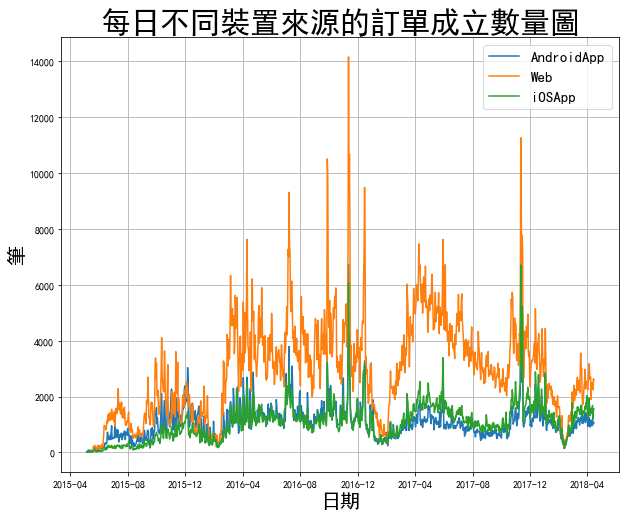

In [8]:
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.figure(figsize=(10,8))
plt.plot(df2)
plt.grid()
plt.title("每日不同裝置來源的訂單成立數量圖",fontsize=30)
plt.xlabel("日期",fontsize=20)
plt.ylabel("筆",fontsize=20)
plt.legend(df2.columns.levels[1],fontsize=15)

In [9]:
df3 = df1/df2
df3.head()

TrackSourceTypeDef                        
TrackSourceTypeDef         AndroidApp         Web      iOSApp
new_DateId                                                   
2015-05-06                 233.350000         NaN  222.000000
2015-05-07                 219.500000  258.428571  210.000000
2015-05-08                 239.000000         NaN  249.625000
2015-05-09                 230.361111  252.000000  288.111111
2015-05-10                 240.358209  210.000000  213.545455

### 依平均訂單金額來看，其實三者大致差不多，並沒有哪一種裝置來源的消費能力特別強。

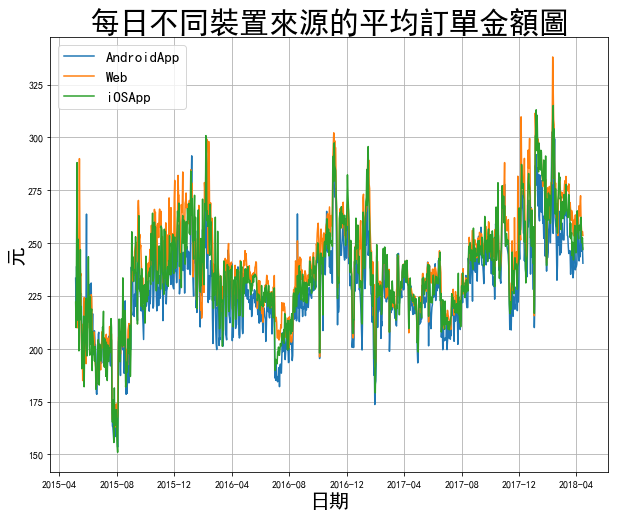

In [10]:
plt.figure(figsize=(10,8))
plt.plot(df3)
plt.grid()
plt.title("每日不同裝置來源的平均訂單金額圖",fontsize=30)
plt.xlabel("日期",fontsize=20)
plt.ylabel("元",fontsize=20)
plt.legend(df3.columns.levels[1],fontsize=15)

In [11]:
df_1= Orders.groupby('Hour').apply(lambda x:x.groupby("TrackSourceTypeDef")["SalesOrderSlaveTotalPayment"].sum())
df_1

TrackSourceTypeDef,AndroidApp,Web,iOSApp
Hour,,,
0,15909997.0,49466063.0,18981449.0
1,11489208.0,34465303.0,13786291.0
2,6991669.0,21147097.0,8926267.0
3,4284991.0,12283791.0,5262160.0
4,2897350.0,8078253.0,3333301.0
5,2081462.0,6503550.0,2401814.0
6,2679629.0,8448311.0,2590703.0
7,4104636.0,13836017.0,4242221.0
8,5996195.0,20149011.0,6284326.0


### 依24小時內不同裝置源的訂單金額來看，三者在午後及半夜的消費能力皆較強

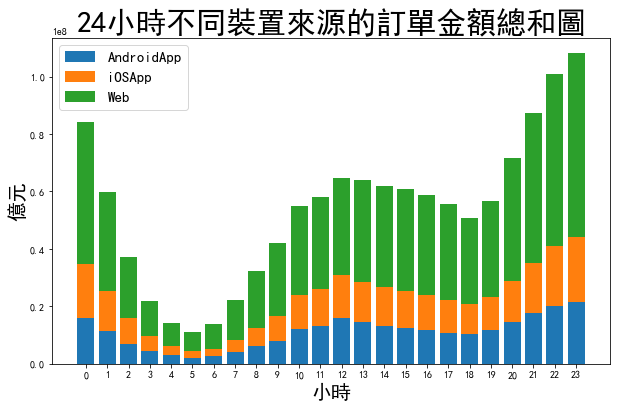

In [12]:
plt.figure(figsize=(10,6))
plt.bar(df_1.index,df_1.AndroidApp)
plt.bar(df_1.index,df_1.iOSApp,bottom = df_1.AndroidApp)
plt.bar(df_1.index,df_1.Web,bottom =df_1.iOSApp+df_1.AndroidApp )
plt.xticks(range(0,24))
plt.title("24小時不同裝置來源的訂單金額總和圖",fontsize=30)
plt.xlabel("小時",fontsize=20)
plt.ylabel("億元",fontsize=20)
plt.legend(["AndroidApp","iOSApp","Web"],fontsize=15)

# 依不同的支付方式區分族群
* 主要分為五種：7-11、family、信用卡、ATM、Linepay
* 依超商取貨支付的族群較多，其次是信用卡，最後才是ATM和LinePay
* 問題：依照心理學來說，不須立即付現的消費方式會降低「花費之痛」，很容易讓人誤判自身的財務狀況，不同的支付方式在24小時間有沒有什麼特別的現象?

In [13]:
Orders.PayProfileTypeDef.value_counts().to_frame()

,PayProfileTypeDef
SevenEleven,2959135
Family,2037871
CreditCardOnce,484949
ATM,9133
LinePay,4188


In [14]:
df1 = Orders.groupby('Hour').apply(lambda x:x.groupby("PayProfileTypeDef")["SalesOrderSlaveTotalPayment"].sum())
df1

PayProfileTypeDef,ATM,CreditCardOnce,Family,LinePay,SevenEleven
Hour,,,,,
0,163704.0,7483599.0,31338080.0,75819.0,45296307.0
1,105555.0,4954026.0,22810641.0,62237.0,31808343.0
2,59949.0,3010825.0,14028143.0,24212.0,19941904.0
3,45043.0,1684597.0,8361608.0,16705.0,11722989.0
4,37483.0,1041106.0,5437983.0,13804.0,7778528.0
5,20111.0,791205.0,4093650.0,5945.0,6075915.0
6,49113.0,919380.0,5284903.0,6974.0,7458273.0
7,61595.0,1518721.0,8625703.0,14934.0,11961921.0
8,76641.0,2769389.0,12262875.0,31343.0,17289284.0


### 依訂單金額總和來看，半夜時超商及信用卡都明顯大幅提高消費金額，而ATM及Linepay則因為數量太少，幅度不明顯。

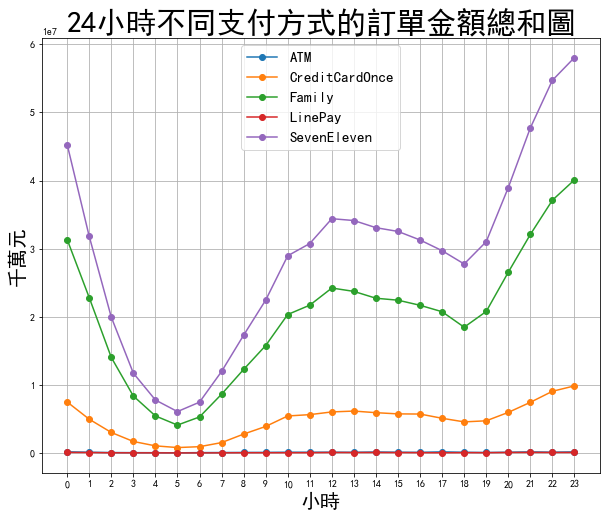

In [15]:
plt.figure(figsize=(10,8))
plt.plot(df1,'o-')
plt.title("24小時不同支付方式的訂單金額總和圖",fontsize=30)
plt.xlabel("小時",fontsize=20)
plt.ylabel("千萬元",fontsize=20)
plt.xticks(range(0,24))
plt.grid()
plt.legend(df1.columns,fontsize=15)

In [17]:
df2 = Orders.groupby('Hour').PayProfileTypeDef.value_counts().to_frame().unstack()
df2

PayProfileTypeDef                                           
PayProfileTypeDef               ATM CreditCardOnce  Family LinePay SevenEleven
Hour                                                                          
0                               670          31506  133345     273      193972
1                               417          20846   97556     255      136625
2                               242          12681   59747     105       85437
3                               179           7104   35608      60       50039
4                               140           4312   22907      49       32679
5                                82           3242   17135      20       25692
6                               189           3804   22058      28       31330
7                               248           6430   35832      58       50089
8                               283          11641   51570     125       72990
9                               306          16358   66706     134       95228
10                              414          22782   86185     137      123573
11                              411          23622   92311     166      130854
12                              463          25385  102892     281      145766
13                              379          25716  100778     231      145244
14                              542          24762   96814     263      141092
15                              455          24195   95273     219      138506
16                              326          24074   91356     157      133291
17                              601          21349   85665     105      125717
18                              383          18978   78426     183      117352
19                              285          19694   87459     144      131239
20                              430          25116  112499     295      165487
21                              617          31274  136066     329      203231
22                              449          38188  158338     285      233703
23                              622          41890  171345     286      249999

### 依訂單成立數量也基本吻合上一張圖

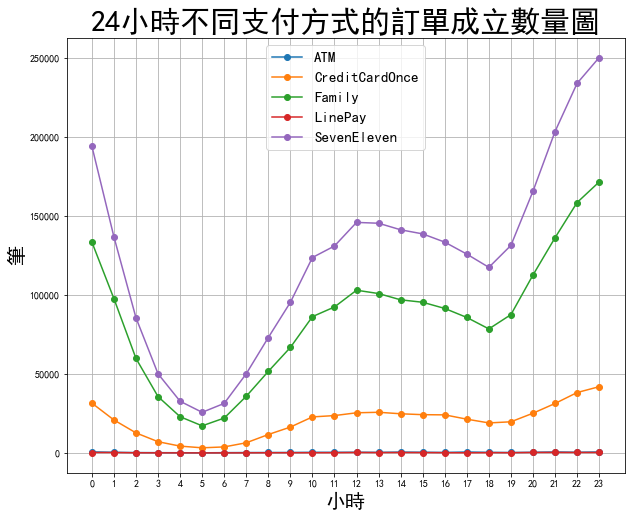

In [18]:
plt.figure(figsize=(10,8))
plt.plot(df2,'o-')
plt.title("24小時不同支付方式的訂單成立數量圖",fontsize=30)
plt.xlabel("小時",fontsize=20)
plt.ylabel("筆",fontsize=20)
plt.xticks(range(0,24))
plt.grid()
plt.legend(df1.columns,fontsize=15)

In [19]:
df3 = df1/df2
df3

PayProfileTypeDef                                         \
PayProfileTypeDef               ATM CreditCardOnce      Family     LinePay   
Hour                                                                         
0                        244.334328     237.529328  235.015036  277.725275   
1                        253.129496     237.648758  233.820995  244.066667   
2                        247.723140     237.428042  234.792425  230.590476   
3                        251.636872     237.133587  234.823860  278.416667   
4                        267.735714     241.443878  237.393941  281.714286   
5                        245.256098     244.048427  238.905748  297.250000   
6                        259.857143     241.687697  239.591214  249.071429   
7                        248.366935     236.193002  240.726250  257.482759   
8                        270.816254     237.899579  237.790867  250.744000   
9                        273.663399     237.888739  236.436917  238.477612   
10                       261.096618     238.355500  235.900249  244.072993   
11                       257.396594     238.158581  235.098840  241.096386   
12                       243.460043     237.328186  235.377668  249.441281   
13                       256.052770     239.179344  235.412362  264.303030   
14                       259.861624     238.775422  234.664904  258.718631   
15                       234.832967     237.066708  235.456803  254.940639   
16                       282.699387     237.302359  237.340853  268.942675   
17                       265.737105     238.448827  242.095803  270.038095   
18                       259.530026     240.352777  235.465292  250.256831   
19                       239.435088     239.743678  237.551687  269.201389   
20                       252.909302     237.122074  235.922097  233.216949   
21                       252.296596     237.749920  235.787383  248.379939   
22                       253.703786     237.104300  234.407773  243.098246   
23                       250.223473     235.073096  234.062622  246.601399   

                               
PayProfileTypeDef SevenEleven  
Hour                           
0                  233.519822  
1                  232.814953  
2                  233.410630  
3                  234.277044  
4                  238.028336  
5                  236.490542  
6                  238.055314  
7                  238.813332  
8                  236.871955  
9                  235.675946  
10                 234.301328  
11                 235.015491  
12                 235.990203  
13                 234.992929  
14                 234.457879  
15                 234.864648  
16                 234.630155  
17                 236.256187  
18                 236.464074  
19                 236.409749  
20                 235.483410  
21                 234.863992  
22                 234.168389  
23                 232.254217

### 依平均訂單來看，ATM及LinePay因為資料量不多，容易受到極端值影響，暫且忽略，從下圖可以發現信用卡的消費金額大部分還是略高於超商取貨，或許是因為信用卡容易令人認為已經付過款，但因為沒有立即少掉現金的心痛感，而容易產生較高的消費。

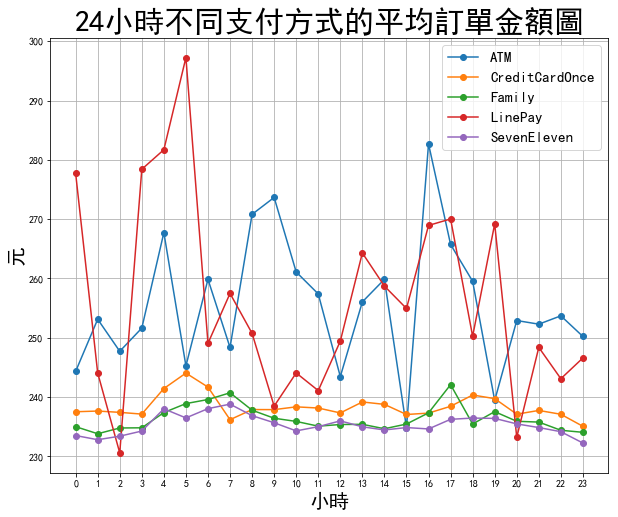

In [21]:
plt.figure(figsize=(10,8))
plt.plot(df3,'o-')
plt.xticks(range(0,24))
plt.grid()
plt.xticks(range(0,24))
plt.title("24小時不同支付方式的平均訂單金額圖",fontsize=30)
plt.xlabel("小時",fontsize=20)
plt.ylabel("元",fontsize=20)
plt.legend(df3.columns.levels[1],fontsize=15)